In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob
import scipy.optimize

In [2]:
flist = glob.glob('*.csv')
# Dose flist[0][4:5]
# Trial flist[0][6:7]

dose0-1.csv
cell number: 68


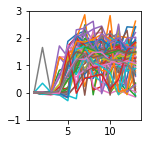

dose0-2.csv
cell number: 67


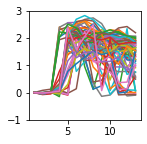

dose0-4.csv
cell number: 68


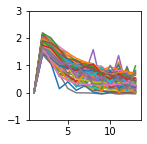

dose0-5.csv
cell number: 100


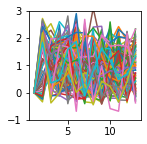

dose1-0.csv
cell number: 73


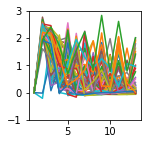

dose1-1.csv
cell number: 74


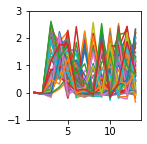

dose1-3.csv
cell number: 71


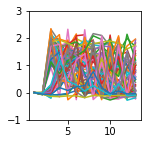

dose2-0.csv
cell number: 69


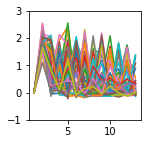

dose2-1.csv
cell number: 80


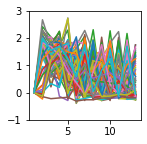

dose2-2.csv
cell number: 84


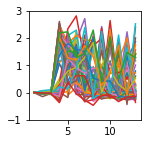

dose2-3.csv
cell number: 69


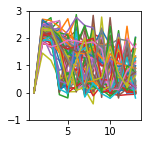

dose3-0.csv
cell number: 97


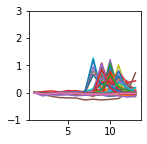

dose3-1.csv
cell number: 122


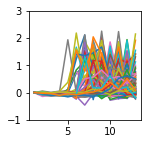

dose3-2.csv
cell number: 86


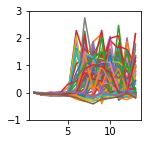

dose3-3.csv
cell number: 85


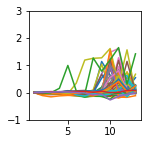

dose4-0.csv
cell number: 42


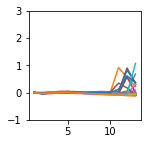

dose4-3.csv
cell number: 100


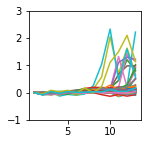

dose4-4.csv
cell number: 44


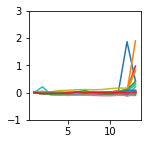

dose5-0.csv
cell number: 40


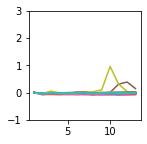

dose5-4.csv
cell number: 73


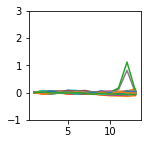

dose5-5.csv
cell number: 60


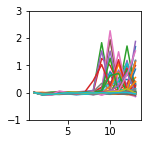

dose6-0.csv
cell number: 88


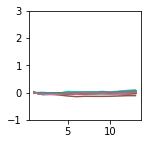

dose6-1.csv
cell number: 88


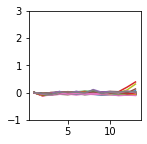

dose6-2.csv
cell number: 51


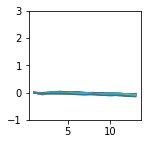

dose7-0.csv
cell number: 80


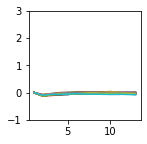

dose7-1.csv
cell number: 102


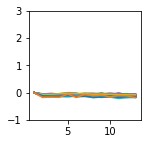

dose7-2.csv
cell number: 79


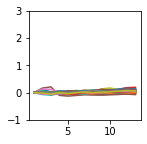

In [3]:
flist = glob.glob('*.csv')

x = [20, 10, 5, 2.5, 1.25, 0.625, 0.3125, 0.15625]
max_list, int_list, conc_list, trial_list, basal_list  = [], [], [], [], []

for i,file in enumerate(flist):
    
    tmp = pd.read_csv(file, index_col=0)
    basal_list = np.hstack([basal_list,tmp.iloc[0,:].values])
    tmp = tmp/ tmp.iloc[0,:] -1
    
    print(file)
    print("cell number: " + str(len(tmp.columns)))
    
    max_list=np.hstack([max_list,tmp.max(axis=0).values])
    int_list=np.hstack([int_list,tmp.sum(axis=0).values])
    conc_list=np.hstack([conc_list,np.full(len(tmp.columns), x[int(file[4:5])])])
    trial_list=np.hstack([trial_list,np.full(len(tmp.columns), file[6:7])])
    
    plt.figure(figsize=(2,2))
    plt.plot(tmp)
    plt.ylim(-1,3)
       
    plt.show()

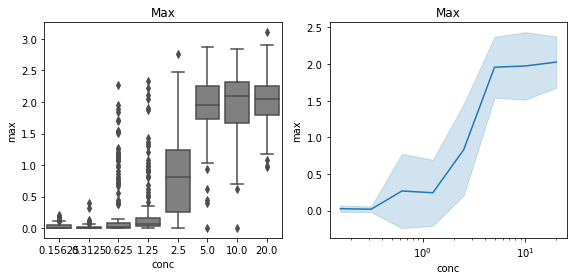

In [4]:
df = pd.DataFrame(max_list, columns={'max'})
df['int'], df['conc'], df['trial'], df['dose'], df['basal'] = int_list, conc_list, trial_list, conc_list, basal_list

plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df, x='conc',y='max', color='gray')
plt.title('Max')

plt.subplot(1,4,2)
sns.lineplot(data=df, x='conc',y='max', markers=True, dashes=False, ci='sd')
plt.xscale('log')
plt.title('Max')

plt.tight_layout()
plt.show()

In [5]:
N_list = [3,3,3,3,4,4,3,4]
df_mean = df.groupby(['conc','trial']).mean()
display(df_mean)
df_mean_mean = df_mean.groupby('conc').mean()
df_mean_sd = df_mean.groupby('conc').std()
df_mean_sem = df_mean_sd['max'].values/ np.sqrt(N_list)
df_mean_sem

max        int      dose      basal
conc     trial                                          
0.15625  0      0.006911  -0.392054   0.15625  68.030825
         1      0.000000  -1.188515   0.15625  48.547069
         2      0.081728   0.268795   0.15625  27.170165
0.31250  0      0.022101  -0.171007   0.31250  56.056591
         1      0.023011  -0.289808   0.31250  39.397023
         2      0.006932  -0.500843   0.31250  29.001255
0.62500  0      0.037209  -0.275138   0.62500  65.455575
         4      0.055769  -0.049486   0.62500  35.246068
         5      0.681560   0.816225   0.62500  26.362067
1.25000  0      0.173045   0.015839   1.25000  83.236262
         3      0.290973   0.736217   1.25000  37.811130
         4      0.205119   0.010821   1.25000  38.819386
2.50000  0      0.395506   0.247353   2.50000  67.936856
         1      1.058402   2.367113   2.50000  46.611566
         2      1.289813   3.458986   2.50000  33.975663
         3      0.537577   0.781874   2.50000  31.768729
5.00000  0      1.899592   6.363432   5.00000  55.266754
         1      1.832835   8.912531   5.00000  47.490862
         2      1.828083   6.252296   5.00000  35.108750
         3      2.317602  14.218366   5.00000  31.111362
10.00000 0      2.332333   8.472341  10.00000  47.177781
         1      1.964081   7.684383  10.00000  55.058622
         3      1.618986   8.464884  10.00000  42.072451
20.00000 1      1.943951  11.296929  20.00000  38.397882
         2      2.235856  15.246536  20.00000  42.776119
         4      1.821208  10.092008  20.00000  87.884750
         5      2.084215  11.632153  20.00000  33.964170

array([0.02616681, 0.00521467, 0.21175834, 0.03520336, 0.21164401,
       0.11716721, 0.20596181, 0.08944847])

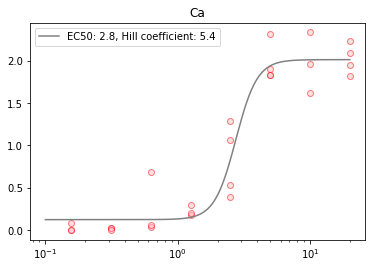

EC50: 2.751743256739331
Hill coefficient: 5.367403138641098


In [6]:
def Hill_fit(x,k,n,Max,Min):
    return (Max+Min)*x**n/(k**n+x**n)+Min

popt,pcov = scipy.optimize.curve_fit(Hill_fit, df_mean_mean.index, df_mean_mean['max'].values, bounds=([0,0,0,0],[10,30,3,1]))

plt.figure()
plt.scatter(x=df_mean['dose'], y=df_mean['max'], color='pink', alpha=0.5, edgecolors="red", linewidth=1)
#plt.errorbar(x=df_mean_mean.index, y=df_mean_mean['max'].values, yerr=df_mean_sem, fmt='o', color='coral', label='Average + SEM')
plt.plot(np.linspace(0.1,20,10000), Hill_fit(np.linspace(0.1,20,10000),popt[0],popt[1],popt[2],popt[3]), color='gray', label='EC50: ' + str(round(popt[0],1)) + ', Hill coefficient: ' + str(round(popt[1],1)))
plt.xscale('log')
plt.xscale('log')
plt.legend(loc='upper left')
plt.title('Ca')
plt.savefig('Ca-doseresponse.jpg',bbox_inches='tight',dpi=300)
plt.savefig('E:/Dropbox/testing-data/20211103-tany-dose-response/ATP_dose_response.pdf')
plt.show()

print('EC50: ' + str(popt[0]))
print('Hill coefficient: ' + str(popt[1]))



[[ 1.         -0.28474534]
 [-0.28474534  1.        ]]


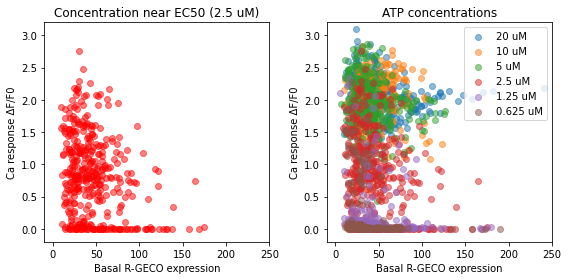

In [8]:
print(np.corrcoef(df.loc[df['conc']==2.5, 'basal'].values, df.loc[df['conc']==2.5, 'max'].values))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(df.loc[df['conc']==2.5, 'basal'], df.loc[df['conc']==2.5, 'max'], color='red',alpha=0.5)
plt.xlabel('Basal R-GECO expression')
plt.ylabel('Ca response ΔF/F0')
plt.title('Concentration near EC50 (2.5 uM)')
plt.ylim(-0.2,3.2)
plt.xlim(-10,250)

plt.subplot(1,2,2)
plt.scatter(df.loc[df['conc']==20, 'basal'], df.loc[df['conc']==20, 'max'], alpha=0.5, label='20 uM')
plt.scatter(df.loc[df['conc']==10, 'basal'], df.loc[df['conc']==10, 'max'], alpha=0.5, label='10 uM')
plt.scatter(df.loc[df['conc']==5, 'basal'], df.loc[df['conc']==5, 'max'], alpha=0.5, label='5 uM')
plt.scatter(df.loc[df['conc']==2.5, 'basal'], df.loc[df['conc']==2.5, 'max'], alpha=0.5, label='2.5 uM')
plt.scatter(df.loc[df['conc']==1.25, 'basal'], df.loc[df['conc']==1.25, 'max'], alpha=0.5, label='1.25 uM')
plt.scatter(df.loc[df['conc']==0.625, 'basal'], df.loc[df['conc']==0.625, 'max'], alpha=0.5, label='0.625 uM')
plt.xlabel('Basal R-GECO expression')
plt.ylabel('Ca response ΔF/F0')
plt.title('ATP concentrations')
plt.legend()
plt.ylim(-0.2,3.2)
plt.xlim(-10,250)
plt.tight_layout()
plt.savefig('E:/Dropbox/testing-data/20211104-tany-reporter-expression-vs-response/Ca.jpg',bbox_inches='tight',dpi=300)
plt.savefig('E:/Dropbox/testing-data/20211104-tany-reporter-expression-vs-response/Ca.pdf')
plt.show()